# Proyecto final Aprendizaje de Máquina: Modelos de predicción para la clasificación y regresión de distintos features


*   Como proyecto, se eligió trabajar sobre una base de datos de la empresa AirBNB. Dichos datos, pueden encontrarse en: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam.
*   Dado el dataset original, se llevó a cabo un preprocesamiento para quitar features no utilizables y un posterior trabajo para reacondicionar aquellos que no eran numéricos.

*   Luego, se utilizaron distintos modelos de regresión (Regresión Lineal, Gradient Booster regressor, Selector PCA + Gradient Booster.) sobre varios features, realizando reportes de métricas y analizando R2 y RMSE.
*   Por otro lado, se llevaron a cabo modelos de predicción para clasificación de distintos features. Para ello se utilizaron distintos métodos (KNN, Random Forest Classifier) y se observó su calidad mediante reportes de métricas.






In [ ]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn as sklearn
from sklearn.metrics import classification_report
import seaborn as sns
import statistics as stt

## Features para quitar para cualquier método

In [ ]:
# cargado del dataset

data = pd.read_csv('https://raw.githubusercontent.com/francosuriano/Proyecto-Final-ML/main/listings_details%20(1).csv')

# vector de features a eliminar y eliminación

out = ['listing_url', 'scrape_id', 'last_scraped', 'listing_url', 'scrape_id', 'experiences_offered',
  'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
  'host_thumbnail_url','host_picture_url', 'street', 'neighbourhood_group_cleansed','city',
  'zipcode', 'market', 'smart_location', 'country_code', 'latitude', 'longitude',
  'bed_type', 'monthly_price', 'license', 'jurisdiction_names','has_availability', 'requires_license',
  'is_business_travel_ready','require_guest_profile_picture', 'require_guest_phone_verification',
  'host_has_profile_pic','calendar_last_scraped','country','state']

data2 = data.drop(out,axis=1)
names = data2.columns
print(len(out))

# longitud de dataset original y dataset sin los features elegidos

print(data.shape)
print(data2.shape)


36
(20030, 96)
(20030, 62)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Observamos si existen valores 'Null' en el dataset:

print(data2[names[0:50]].isnull().sum())
print('-------------------------')
print(data2[names[50:71]].isnull().sum())
# print(df.isna().sum())

id                               0
name                            38
summary                        520
space                         5451
description                    124
neighborhood_overview         6773
notes                        10999
transit                       6395
access                        7803
interaction                   8056
house_rules                   7459
host_id                          0
host_since                       4
host_location                   39
host_about                    8227
host_response_time            9483
host_response_rate            9483
host_acceptance_rate         20030
host_is_superhost                4
host_neighbourhood            5808
host_listings_count              4
host_total_listings_count        4
host_verifications               0
host_identity_verified           4
neighbourhood                 1653
neighbourhood_cleansed           0
is_location_exact                0
property_type                    0
room_type           

In [ ]:
# Observamos si existen valores 'NaN' en el dataset:

print(data2[names[1:50]].isna().sum())
print('-------------------------')
print(data2[names[50:71]].isna().sum())
# print(df.isna().sum())


name                            38
summary                        520
space                         5451
description                    124
neighborhood_overview         6773
notes                        10999
transit                       6395
access                        7803
interaction                   8056
house_rules                   7459
host_id                          0
host_since                       4
host_location                   39
host_about                    8227
host_response_time            9483
host_response_rate            9483
host_acceptance_rate         20030
host_is_superhost                4
host_neighbourhood            5808
host_listings_count              4
host_total_listings_count        4
host_verifications               0
host_identity_verified           4
neighbourhood                 1653
neighbourhood_cleansed           0
is_location_exact                0
property_type                    0
room_type                        0
accommodates        

In [ ]:
# Dado que existen features con Null en todos los datos,
# procedemos a quitar dichos features ya que carecen de información

features = []

# elegimos como umbral la mitad del dataset
for i in range(0,data2.shape[1]):
  if (data2[names[i]].isnull().sum()<=15000 or data2[names[i]].isna().sum()<=15000):
    features.append(names[i])

# armamos el nuevo dataset con los features utiles

df = data2[features]
features_names = df.columns

# 1) Modelo de regresión sobre target elegido


In [ ]:
# Features quitados para la regresión

out_regression = ['id', 'name', 'summary', 'space', 'description', 'host_verifications',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_id','host_about', 'amenities', 'host_location', 'host_neighbourhood']

# Ver que hacer con host_location, host_neigh, host_verfic porque getdummies da muchas cols

df_r = df.drop(out_regression,axis=1)
names_r = df_r.columns
df_r.fillna(0, inplace=True)

In [ ]:
from datetime import datetime

# funcion que transofrma strings a numeros para un feature especifico

def str2num_cat(ds, feats):

  aux = ds.drop(feats, axis=1)

  for i in range(0,len(feats)):

    new_features = pd.get_dummies(df_r[feats[i]])
    aux = pd.concat([aux, new_features], axis=1)

  return aux

################################################################################



def str2num_cat2(ds, feats):

  aux = ds.copy(deep=True)

  for i in range(0,len(feats)):

    count = aux[feats[i]].value_counts()
    count = pd.Series(count)

    for j in range(0,count.size):
      aux.loc[aux[feats[i]]==count.index[j], feats[i]]=j

  return aux


################################################################################



# función que elimina los simbolos de $ y % según se elija

def change_sym(ds,feats,symbol):

  aux = ds.copy(deep=True)

  for i in range(0,len(feats)):
    aux[feats[i]] = aux[feats[i]].str.replace(symbol,'')
    aux[feats[i]] = aux[feats[i]].str.replace(',','')
    aux[feats[i]] = pd.to_numeric(aux[feats[i]])
    aux[feats[i]]= aux[feats[i]].fillna(0)
    aux[feats[i]] = pd.to_numeric(aux[feats[i]])

  return aux


################################################################################

# Función que transforma las fechas en años numéricos

def date2num(ds,feat):

  aux = ds.copy(deep=True)
  dt = []

  # vector de fechas como objetos
  for i in range (0,df_r[feat].size):
    if type(df_r[feat][i])!=int:
      fecha= (datetime.strptime(df_r[feat][i], '%Y-%m-%d'))
      dt.append((2020- (fecha.year + fecha.month/12 + fecha.day/365))*365) # contamos los años desde la primer review
    else:
      dt.append(0)

  aux[feat] = dt

  return aux


################################################################################


# Funcion para convertir valores booleanos en enteros

def bool2int(ds,feats):

  aux = ds.copy(deep=True)

  for i in range(0,len(feats)):
    aux.loc[aux[feats[i]]=='f',feats[i]]=0
    aux.loc[aux[feats[i]]=='t',feats[i]]=1

  return aux


################################################################################


# Función auxiliar para time2num(). Verifica si un string se encuentra en una oración o no

def isword(sentence,word):
  if word in sentence:
    return True
  else:
    return False

# Funcion para convertir cantidad de dias en formato string en enteros

def time2num(ds):

  aux = ds.copy(deep=True)
  #print(ds['calendar_updated'])

  for i in range(0,len(ds['calendar_updated'])): # se recorre todo el feature

    string = ds['calendar_updated'][i]


    if isword(str(aux['calendar_updated'][i]),'never'): aux.at[i, 'calendar_updated'] = 0

    if string[0].isdigit(): # se analiza si el primer 'char' es un número

      if isword(str(aux['calendar_updated'][i]),'days'): aux.at[i, 'calendar_updated'] = int(string[0])
      elif isword(str(aux['calendar_updated'][i]),'week'): aux.at[i, 'calendar_updated'] = 7*int(string[0])
      elif isword(str(aux['calendar_updated'][i]),'months'): aux.at[i, 'calendar_updated'] = 30*int(string[0])

    else: # si el primer 'char' no es un número, se analiza si es 'a' o no
      if string[0]!='a': # si el primer 'char' no es 'a', entonces es 'hoy' o 'ayer'

        if isword(str(aux['calendar_updated'][i]),'today'): aux.at[i, 'calendar_updated'] = 0
        elif isword(str(aux['calendar_updated'][i]),'yesterday'): aux.at[i, 'calendar_updated'] = 1

      else: # por último, si el primer 'char' es 'a', se puede tratar de una semana o un mes

        if isword(str(aux['calendar_updated'][i]),'week'): aux.at[i, 'calendar_updated'] = 7
        elif isword(str(aux['calendar_updated'][i]),'month'): aux.at[i, 'calendar_updated'] = 30


  return aux


In [ ]:
# vectores de features string categoricos y ordinal

features_str_cat = ['neighbourhood', 'neighbourhood_cleansed', 'room_type', 'property_type']
features_str_ord = ['host_response_time','cancellation_policy']
bool_feats = ['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable']
#target_clas = ['property_type']

# transformamos los features de string categoricos

#df_r = str2num_cat(df_r, features_str_cat)
df_r = str2num_cat2(df_r, features_str_cat)

# quitamos los simbolos $ y % de los features que los contengan para que sean numeros.

df_r = change_sym(df_r,['price', 'security_deposit','cleaning_fee','extra_people'],'$')
df_r = change_sym(df_r,['host_response_rate'],'%')

# transformacion datos de tipo fecha

df_r = date2num(df_r,'first_review')
df_r = date2num(df_r,'last_review')
df_r = date2num(df_r,'host_since')

# transformacion datos bool

df_r = bool2int(df_r,bool_feats)

# transformamos los features de string ordinal mediante asignación numérica:

frecs = df_r[features_str_ord[0]].value_counts()
frecs = pd.Series(frecs)
for i in range(0,frecs.size):
  df_r.loc[df_r['host_response_time']==frecs.index[i],'host_response_time']=i

frecs2 = ['flexible','moderate','strict_14_with_grace_period','super_strict_60']
for i in range(0,len(frecs2)):
  df_r.loc[df_r['cancellation_policy']==frecs2[i],'cancellation_policy']=i


# transformamos los datos de 'calendar_updated' de strings a valores numericos

df_r = time2num(df_r)


<ipython-input-7-000d74f0806a>:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aux[feats[i]] = aux[feats[i]].str.replace(symbol,'')


# Graficos de features

In [ ]:

from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):

    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)

    if p_value > 0.05:
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else:
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')

    return normal

# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):

    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(25,30))
    plt.subplots_adjust(hspace=1, wspace=0.5)
    axes = axes.ravel()

    count = 0

    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    #axes[1].remove()
    plt.show()

# Funciones de regresion y elección de features con modelos

In [ ]:
#@title Regression Function (función)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import multiprocessing

def Regression(model, selected_features, target, n, k, selector, model_name):

  rmse_train = []
  r2_train = []
  score_train = []
  rmse_test = []
  r2_test = []
  score_test = []

  for i in range(0,n):

    X_train, X_test, Y_train, Y_test = train_test_split(selected_features[i],
                                      target, test_size = 0.3,
                                      random_state=0)

    model.fit(X_train, Y_train)

    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))/100
    rmse_train.append(rmse)
    r2 = r2_score(Y_train, y_train_predict)
    r2_train.append(r2)
    # score = cross_val_score(estimator = model, X = X_train,
                  # y = Y_train, scoring = 'neg_root_mean_squared_error',
                  # cv = 5).mean()
    # score_train.append(-1*score)

    model.fit(X_test, Y_test)

    y_train_predict = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_train_predict)))/100
    rmse_test.append(rmse)
    r2 = r2_score(Y_test, y_train_predict)
    r2_test.append(r2)
    # score = cross_val_score(estimator = model, X = X_test,
                  # y = Y_test, scoring = 'neg_root_mean_squared_error',
                  # cv = 5).mean()
    # score_test.append(-1*score)

  tit = 'Reduccion de dimensionalidad usando selector '
  tit = tit + selector + ' y regresion ' + model_name


  fig_ancho = 3
  fig_alto = 1
  fig, axes = plt.subplots(1, 2, figsize=((fig_ancho*25)//5, (fig_alto*8)//2))
  #plt.subplots_adjust(hspace=0.5, wspace=1)
  plt.suptitle(tit)

  axes[0].plot(k, rmse_train, label="rmse")
  axes[0].plot(k, r2_train, label="r2")
  # axes[0].plot(k, score_train, label="cv scores")
  axes[0].set_xlabel("Cantidad de features seleccionados")
  axes[0].set_title("Evolución de los parametros de evaluacion para train")
  axes[0].legend();

  axes[1].plot(k, rmse_test, label="rmse")
  axes[1].plot(k, r2_test, label="r2")
  # axes[1].plot(k, score_test, label="cv scores")
  axes[1].set_xlabel("cantidad de features seleccionados")
  axes[1].set_title("Evolución de los parametros de evaluacion para test")
  axes[1].legend();

In [ ]:

# seleccion de posibles targets para regresión y separación en features y target

#target_name_r = ['price','host_response_rate','review_scores_rating','review_scores_cleanliness',
#               'review_scores_checkin','review_scores_communication','review_scores_value',
#               'review_scores_location','reviews_per_month','cleaning_fee']


target_name_r = ['price','host_response_rate','reviews_per_month','cleaning_fee']

In [ ]:
def regresiones(features,target):

  # Select KBEST

  features_r = features
  target_r = target

  # vector de features seleccionados

  from sklearn.feature_selection import f_regression
  from sklearn.feature_selection import SelectKBest
  from sklearn.preprocessing import StandardScaler

  # Se crea una matriz que contiene versiones del dataset con distinta
  # cantidad de features

  n = 1
  k = []
  selected_features = []

  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features_r)
  #scaled_target = scaler.fit_transform(target)

  for i in range(2,30):

    f = pd.DataFrame(SelectKBest(f_regression, k=i).fit_transform(scaled_features, target_r))
    selected_features.append(f)
    k.append(i)
    n = n + 1

  selected_features.append(features_r)
  k.append(i+1)


  # Linear Regression

  from sklearn.linear_model import LinearRegression

  Regression(LinearRegression(), selected_features, target_r,
           n, k, 'SelectKbest', 'Lineal')

  # Gradient Boosting Regressor

  from sklearn.ensemble import GradientBoostingRegressor

  Regression(GradientBoostingRegressor(n_estimators = 50,
                  random_state = 0, learning_rate= 0.1),
            selected_features, target_r, n, k, 'SelectKbest',
            'Gradient Boost')



  from sklearn.feature_selection import RFE
  from sklearn.decomposition import PCA
  from sklearn.linear_model import LogisticRegression

  # model = GradientBoostingRegressor(n_estimators = 100,
                  # random_state = 0, learning_rate= 0.1, max_leaf_nodes = 5, n_iter_no_change = 1000)

  #model = LogisticRegression(random_state=0)
  model = LinearRegression()

  n = 1
  k = []
  selected_features2 = []

  for i in range(15,25):

    f = pd.DataFrame(PCA( n_components = i, random_state = 0).fit_transform(scaled_features, target_r))
    selected_features2.append(f)
    k.append(i)
    n = n + 1

  selected_features2.append(scaled_features)
  k.append(i+1)

  Regression(model, selected_features2, target_r,
            n, k, 'PCA', 'GradientBoosting')



  return None

# Target de regresión: 'price' (precio)

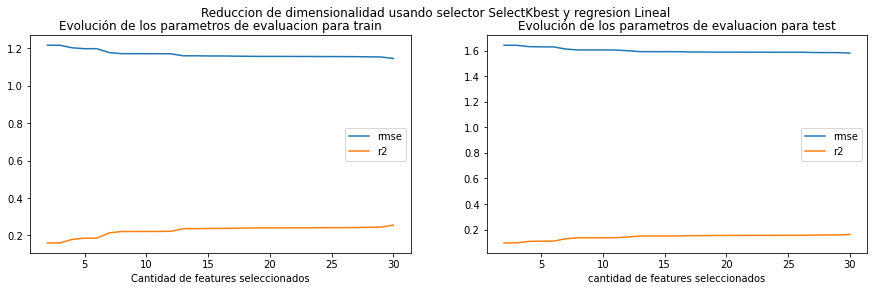

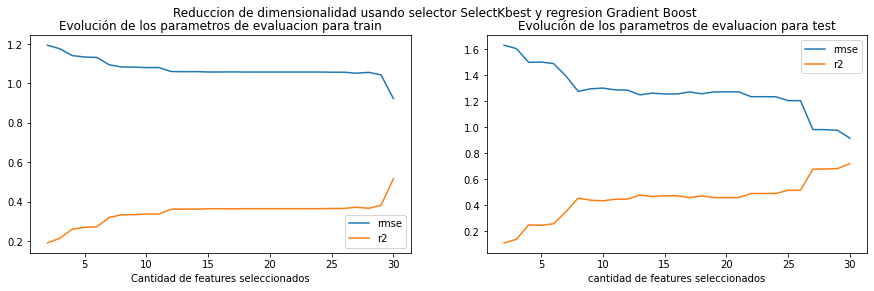

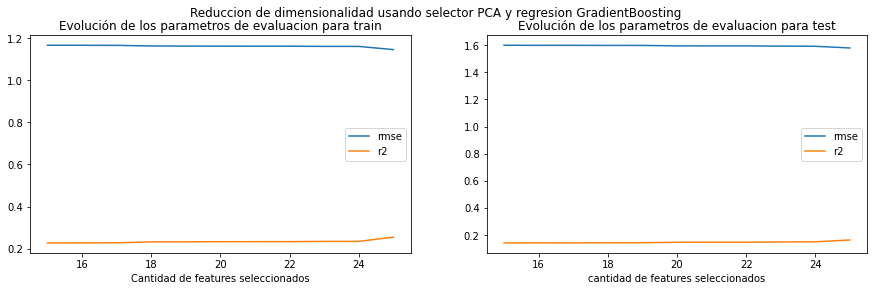

In [ ]:
regresiones( df_r.drop([target_name_r[0]],axis=1),  df_r[target_name_r[0]])



*   Para el target de precio: 'price', se observa la dificultad de obtener buenas métricas de score. En particular, con los métodos de Regresión Lineal y PCA con Gradient Boost, se tiene un valor casi constante de exactitud independientemente de la cantidad de features seleccionados (por lo que estos métodos no resultan óptimos para este caso particular).

*   Por otro lado, utilizando solamente Gradient Boost, fue posible obtener mejores resultados llegando a valores de score de 0.7 o 0.8.

* Claramente, el aumento de features seleccionados contribuye a un mejor score.




# Target de regresión: 'host_response_rate' (tasa de respuesta del host)

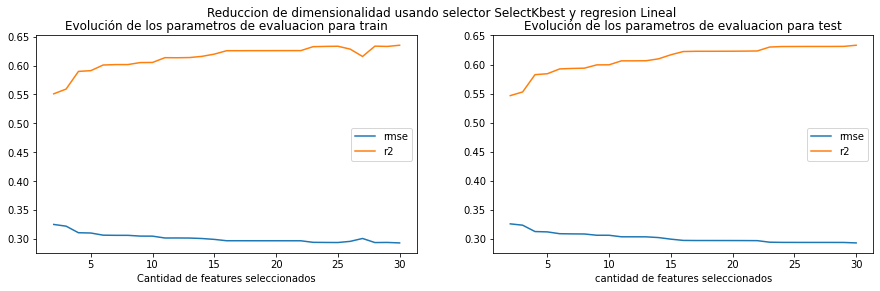

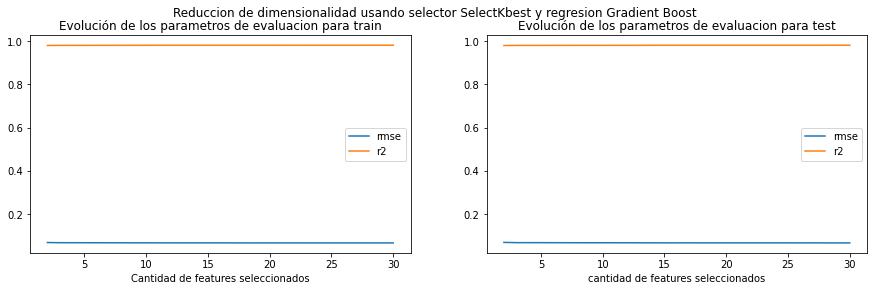

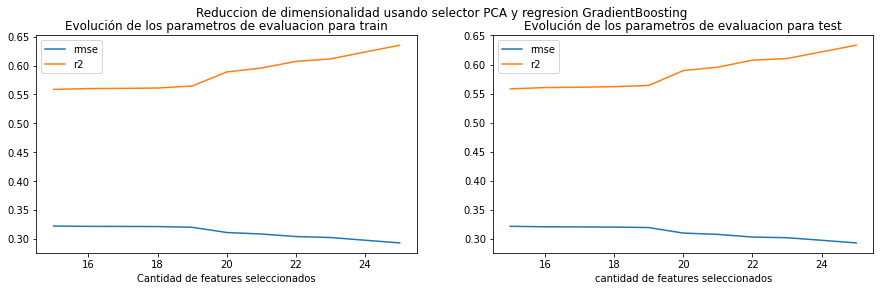

In [ ]:
regresiones( df_r.drop([target_name_r[1]],axis=1),  df_r[target_name_r[1]])


*   Para el target de ratio de respuesta del host: 'host_response_rate', se observan resultados aceptables de score utilizando la Regresión Lineal, llegando a valores de 0.65 aproximadamente.

*   Por otro lado, utilizando solamente Gradient Boost, ?

* Por último, utilizando PCA y regresión de Gradient Boost, se tiene un comportamiento similar al de la regresión lineal. Es decir, un valor de 0.65 aproximadamente.


*  Tanto en la regresión lineal como en la regresión con PCA y Gradient Boost se observa un aumento progresivo del score a medida que aumentamos la cantidad de features, por lo que para maximizar la exactitud de la predicción en este caso sería razonable utilizar la mayor cantidad de features posibles.






# Target de regresión: 'reviews_per_month' (reviews por mes)

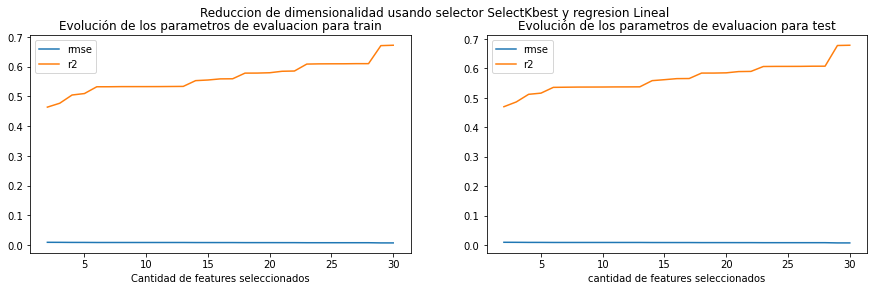

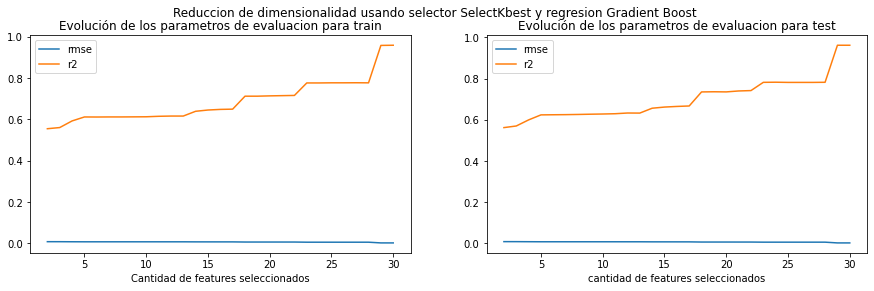

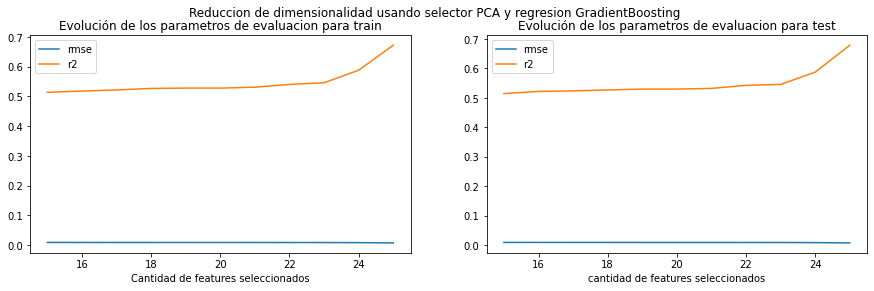

In [ ]:
regresiones( df_r.drop([target_name_r[2]],axis=1),  df_r[target_name_r[2]])

*   Para el target de reviews por mes: 'reviews_per_month', se observan buenos resultados con los tres métodos de regresión aplicados. En particular, se tiene el mayor score con Gradient Boost, llegando a 0.8 (e inclusive más si se aumentan los features). Para la regresión lineal y la de PCA con Gradient Boost se tienen tendencias similares de aumento con la cantidad de features.

* Es interesante observar que el aumento en la curva de score se vuelve más pronunciado en el final, donde un pequeño cambio en la cantidad de features sube considerablemente el score.


# Target de regresión: 'cleaning_fee' (tarifa de limpieza)

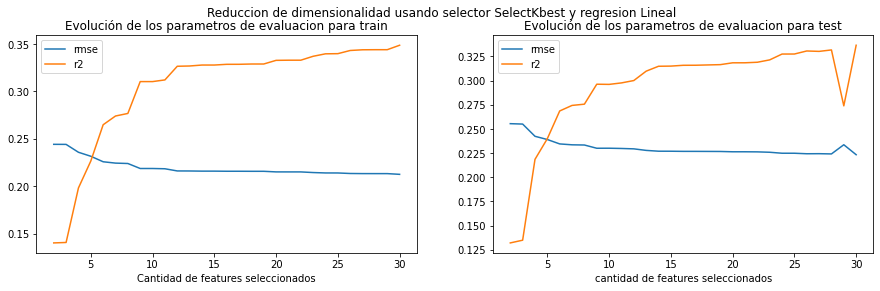

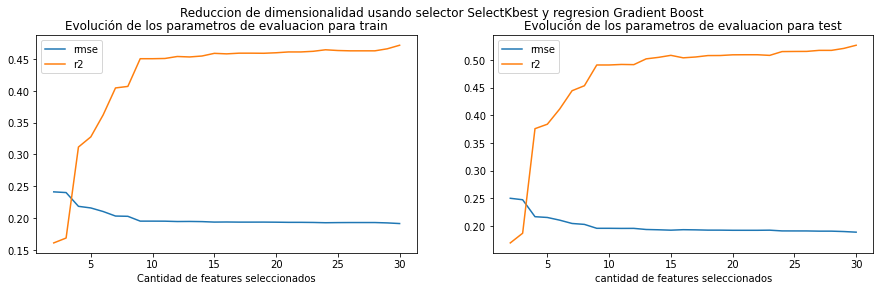

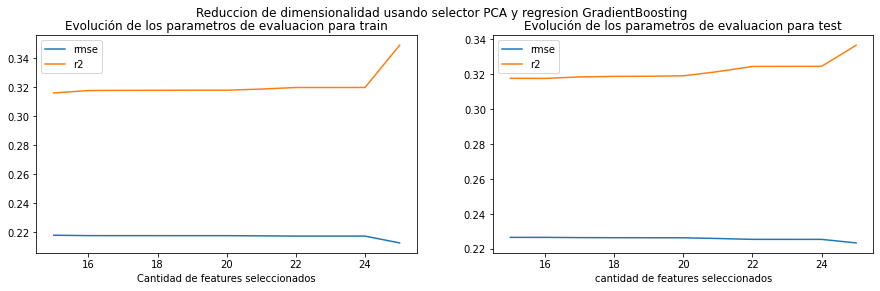

In [ ]:
regresiones( df_r.drop([target_name_r[3]],axis=1),  df_r[target_name_r[3]])

*   Para el target de tarifa de limpieza: 'cleaning_fee', se observa la dificultad de obtener buenas métricas de score. Tanto con la regresión lineal como con el método de PCA y gradient Boost se observan ligeros aumentos en el score, pero en ningún caso supera un valor de 0.35 aproximadamente.

*   Por otro lado, utilizando solamente Gradient Boost, fue posible obtener mejores resultados llegando a valores de score de 0.5 aproximadamente.


In [ ]:
# Hacemos también un mapa de correlación

corr_df = pd.concat([features_r, target_r], axis=1).corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

# Clasificacion

In [ ]:
def clasificaciones(features, target):

  # Clasificacion con KNN

  from sklearn.model_selection import train_test_split
  import seaborn as sns
  import statsmodels.api as sm
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.metrics import classification_report
  from sklearn import svm
  from sklearn import neighbors
  from sklearn import metrics
  from scipy.stats import norm

  x_train, x_test, y_train, y_test = train_test_split(features, target,
                                        test_size = 0.2, random_state = 20)

  n_amount = 20
  n = np.arange(2,n_amount+1)
  score = np.zeros(n_amount-1)
  score2 = np.zeros(n_amount-1)

  # Se analizan los dos conjuntos de datos tomando distintos valores de k

  for k in range(2,n_amount+1):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score[k-2] = knn.score(x_test, y_test)


  plt.plot(n,score)
  plt.xlabel('vecinos')
  plt.ylabel('Score')
  plt.legend([target.name])
  plt.title('Clasificación con KNN')

  plt.show()

 # print(classification_report(y_test, y_pred))


  # Clasificacion para Random Forest Classifier con criterio entrópico

  n_f = np.zeros(10)

  for i in range(0,10):
    n_f[i] = 20*(i+1)

  score = np.zeros(10)
  aux = 0

  for k in n_f:

    RF = RandomForestClassifier(random_state = 1 , n_estimators = int(k),
          criterion = 'entropy', n_jobs       = 2)

    RF.fit(x_train, y_train)
    #y_pred_RF[aux]  = RF.predict(x_test)
    score[aux] = RF.score(x_test,y_test)
    aux = aux + 1

  plt.plot(n_f,score)
  plt.xlabel('Estimadores')
  plt.ylabel('Score')
  plt.legend([target.name])
  plt.title('Clasificación con Random Forest Classifier con criterio entrópico')

  # Evaluacion del modelo

  y_pred_RF  = RF.predict(x_test)
  #print(classification_report(y_test, y_pred_RF))




  return None

In [ ]:
target_name_c = ['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable' ]
df_c = str2num_cat2(df_r, ['property_type'])


# Target de clasificación: 'host_is_superhost' (host es superhost)

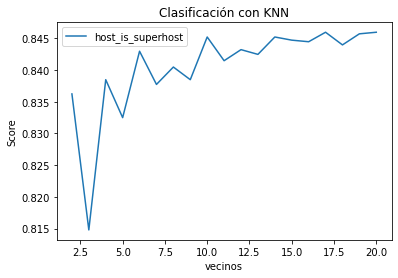

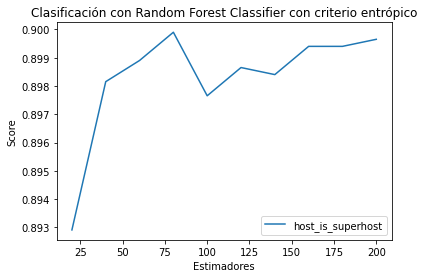

In [ ]:
clasificaciones(df_c.drop(['host_is_superhost'],axis=1), df_c['host_is_superhost'].astype('int'))

# Target de clasificación: 'host_identity_verified' (host posee identidad verificada)

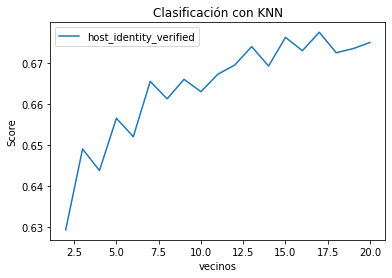

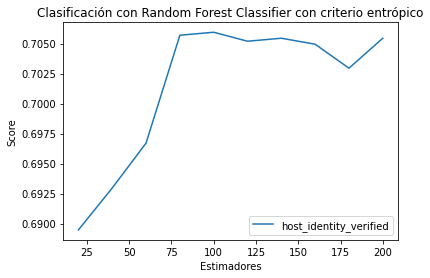

In [ ]:
clasificaciones(df_c.drop(['host_identity_verified'],axis=1), df_c['host_identity_verified'].astype('int'))

# Target de clasificación: 'is_location_exact' (la locación es exacta)

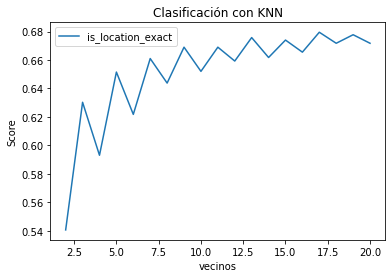

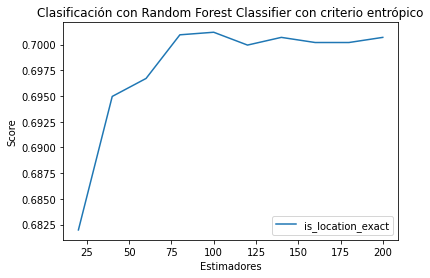

In [ ]:
clasificaciones(df_c.drop(['is_location_exact'],axis=1), df_c['is_location_exact'].astype('int'))

# Target de clasificación: 'instant_bookable' (bookeable al instante)

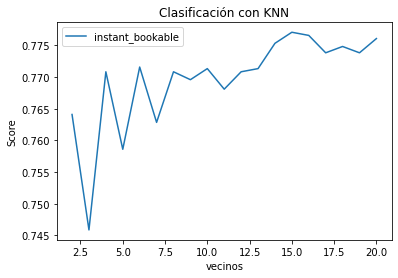

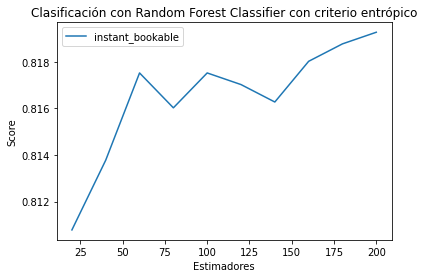

In [ ]:
clasificaciones(df_c.drop(['instant_bookable'],axis=1), df_c['instant_bookable'].astype('int'))